# Conjunto de Ejercicios

## Primer Ejercicio

**Dados los siguientes datos:**
| **$X_i$** | 4.0 | 4.2 | 4.5 | 4.7 | 5.1 | 5.5 | 5.9 | 6.3 | 6.8 | 7.1 |
|-----------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| **$Y_i$** | 102.56 | 130.11 | 113.18 | 142.05 | 167.53 | 195.14 | 224.87 | 256.73 | 299.50 | 326.72 |           

**a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.**

In [223]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
ys = np.array([102.56, 130.11, 113.18 , 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])


Para un polinomio de grado 1, el error está dado por:

$$E = \sum_{i=1}^n \left[ y_i - (a_1 x_i + a_0) \right]^2$$

Encontrar las incógnitas $a_1$ y $a_0$ respectivamente, se requiere de dos ecuaciones que se obtienen de las derivadas parciales del error ($E$) respecto de cada una de ellas, posteriormente se iguala cada ecuación a cero.

De este modo, se obtiene lo siguiente:


$$
\frac{\delta E}{\delta a_0} = -2 \sum_{i=1}^n \left( y_i - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_1} = -2 \sum_{i=1}^n x_i \left( y_i - a_1 x_i - a_0 \right) = 0
$$



Reemplando los valores de $x_s$ y $y_s$, se da lugar a las dos ecuaciones:

$$
54.1a_0 + 303.39a_1 = 11361.764
$$
$$
10a_0 + 54.1a_1 = 1958.39
$$

Al resolver el sistema de ecuaciones con el cambio de variable $a_1 = m$ y $a_0 = b$, se obtiene:

In [224]:
sum_x = sum(xs)
sum_y = sum(ys)
sum_x2 = sum([x**2 for x in xs])
sum_xy = sum([x*y for x, y in zip(xs, ys)])
n = len(xs)

m = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
b = (sum_y - m*sum_x) / n
m,b


(71.61024372023516, -191.57241852647218)

Una vez calculadas las incógnitas, se calcula el error:

In [225]:
error = sum((y - (m * x + b)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 1058.8388862638917
El error real (RMSE) es: 10.289989729168303


Polinomio de mínimos cuadrados: 71.61024372023529x + -191.57241852647266


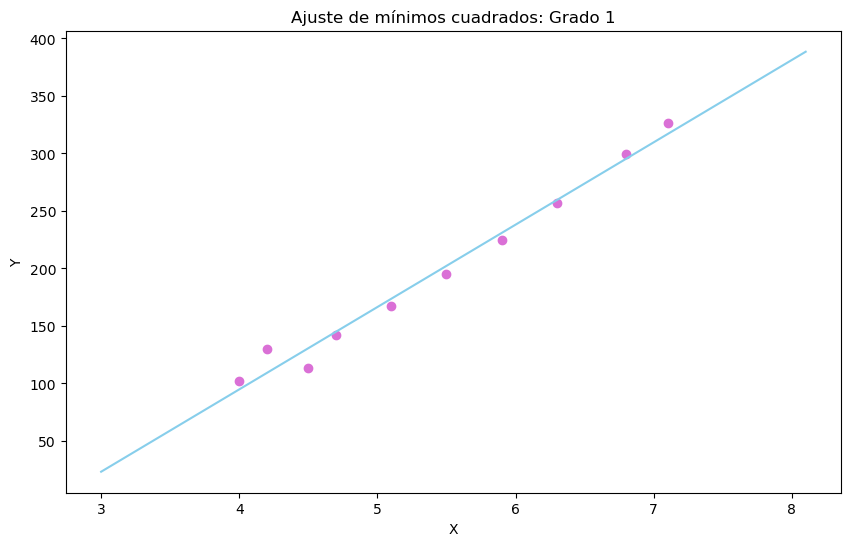

In [226]:
def min_Cuadrados(xs, ys):
    m, b = np.polyfit(xs, ys, 1)  
    print(f"Polinomio de mínimos cuadrados: {m}x + {b}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="orchid", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = m * x_line + b
    plt.plot(x_line, y_line, color="skyblue", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 1")
    plt.show()

min_Cuadrados(xs, ys)

**b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.**

Para un polinomio de grado 2, el error está definido como:

$$
E = \sum_{i=1}^n \left[ y_i - \left( a_2 x_i^2 + a_1 x_i + a_0 \right) \right]^2
$$


Obtener las incógnitas de $a_2$, $a_1$ y $a_0$ requiere de tres ecuaciones que se obtienen de las derivadas parciales de $E$ respecto a cada una de ellas. 

De este modo, se obtiene lo siguiente:


$$
\frac{\delta E}{\delta a_2} = -2 \sum_{i=1}^n x_i ^ 2\left( y_i - a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_1} = -2 \sum_{i=1}^n x_i \left( y_i - a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_0} = -2 \sum_{i=1}^n \left( y_i - a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$


Simplificando estas expresiones, las ecuaciones a obtener con los datos dados son las siguientes:

1. $\sum_{i=1}^n y_i x_i ^ 2  - a_2 x_i^4 - a_1 x_i^3 - a_0 x_i ^ 2 $

2. $\sum_{i=1}^n y_i x_i  - a_2 x_i^3 - a_1 x_i^2 - a_0 x_i $

3. $\sum_{i=1}^n y_i - a_2 x_i^2 - a_1 x_i - a_0 $

Al resolver el sistema de ecuaciones se obtiene:

In [227]:
sum_x2y = sum([x**2*y for x, y in zip(xs, ys)])
sum_x4 = sum([x**4 for x in xs])
sum_x3 = sum([x**3 for x in xs])
sum_x2 = sum([x**2 for x in xs])
sum_xy = sum([x*y for x, y in zip(xs, ys)])
sum_x = sum(xs)
sum_y = sum(ys)
n = len(xs)

# Matriz de coeficientes
A = np.array([
    [sum_x4, sum_x3, sum_x2],
    [sum_x3, sum_x2, sum_x],
    [sum_x2, sum_x, n]
])

# Vector de términos independientes
B = np.array([sum_x2y, sum_xy, sum_y])

# Resolver el sistema de ecuaciones
coefficients = np.linalg.solve(A, B)

a2, a1, a0 = coefficients
print(f"a2: {a2}, a1: {a1}, a0: {a0}")


a2: 8.217072320283874, a1: -19.308603792136697, a0: 51.000789390367075


Una vez calculadas las incógnitas se estima el error:

In [228]:
error = sum((y - (a2 * x **2 + a1 * x + a0)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 551.6562001170247
El error real (RMSE) es: 7.4273561925965605


Polinomio de mínimos cuadrados: 8.21707232027676x^2 + -19.30860379205761x+ 51.000789390155134


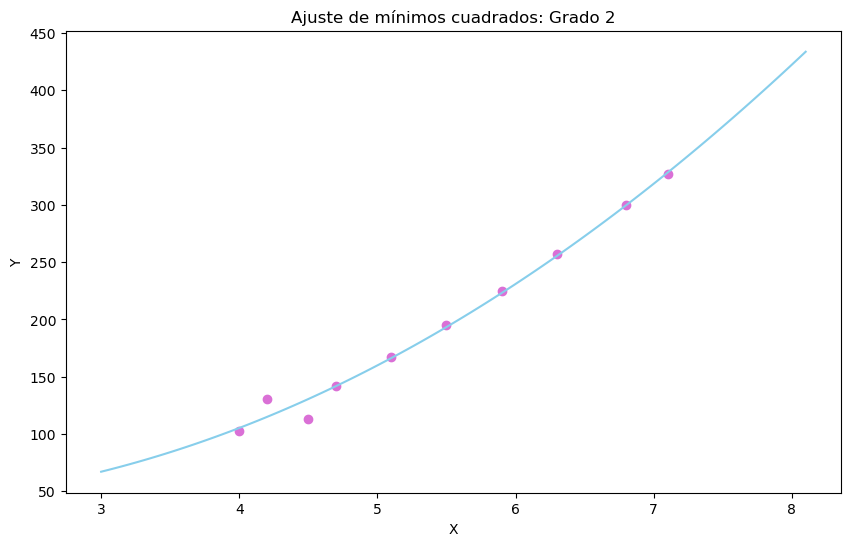

In [229]:
def min_Cuadrados(xs, ys):
    a,b,c = np.polyfit(xs, ys, 2)  
    print(f"Polinomio de mínimos cuadrados: {a}x^2 + {b}x+ {c}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="orchid", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = a * x_line**2 + b * x_line + c
    plt.plot(x_line, y_line, color="skyblue", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 2")
    plt.show()

min_Cuadrados(xs, ys)

**c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.**

Para un polinomio de grado 3, el error está definido como:

$$
E = \sum_{i=1}^n \left[ y_i - \left( a_3 x_i^3 + a_2 x_i^2 + a_1 x_i + a_0 \right) \right]^2
$$


Obtener las incógnitas de $a_3$, $a_2$, $a_1$ y $a_0$ requiere de cuatro ecuaciones que se obtienen de las derivadas parciales de $E$ respecto a cada una de ellas. 

De este modo, se obtiene lo siguiente:

$$
\frac{\delta E}{\delta a_3} = -2 \sum_{i=1}^n x_i ^ 3 \left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_2} = -2 \sum_{i=1}^n x_i ^ 2\left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_1} = -2 \sum_{i=1}^n x_i \left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_0} = -2 \sum_{i=1}^n \left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$


Simplificando estas expresiones, las ecuaciones a obtener con los datos dados son las siguientes:

1. $\sum_{i=1}^n y_i x_i ^ 3  - a_3 x_i^6 - a_2 x_i^5 - a_1 x_i^4 - a_0 x_i ^ 3 $

2. $\sum_{i=1}^n y_i x_i ^ 2  - a_3 x_i^5 - a_2 x_i^4 - a_1 x_i^3 - a_0 x_i ^ 2 $

3. $\sum_{i=1}^n y_i x_i  - a_3 x_i^4 - a_2 x_i^3 - a_1 x_i^2 - a_0 x_i $

4. $\sum_{i=1}^n y_i - a_3 x_i^3 - a_2 x_i^2 - a_1 x_i - a_0 $

In [230]:
sum_x3y = sum([x**3*y for x, y in zip(xs, ys)])
sum_x6 = sum([x**6 for x in xs])
sum_x5 = sum([x**5 for x in xs])
sum_x2y = sum([x**2*y for x, y in zip(xs, ys)])
sum_x4 = sum([x**4 for x in xs])
sum_x3 = sum([x**3 for x in xs])
sum_x2 = sum([x**2 for x in xs])
sum_xy = sum([x*y for x, y in zip(xs, ys)])
sum_x = sum(xs)
sum_y = sum(ys)
n = len(xs)

# Matriz de coeficientes
A = np.array([
    [sum_x6, sum_x5, sum_x4,sum_x3],
    [sum_x5,sum_x4, sum_x3, sum_x2],
    [sum_x4,sum_x3, sum_x2, sum_x],
    [sum_x3,sum_x2, sum_x, n]
])

# Vector de términos independientes
B = np.array([sum_x3y,sum_x2y, sum_xy, sum_y])

# Resolver el sistema de ecuaciones
coefficients = np.linalg.solve(A, B)

a3, a2, a1, a0 = coefficients
print(f"a3: {a3}, a2: {a2}, a1: {a1}, a0: {a0}")


a3: -2.6068387238949615, a2: 51.56095695217632, a1: -254.8747834715453, a0: 469.16326544006233


Una vez calculadas las incógnitas se estima el error:

In [231]:
error = sum((y - (a3 * x **3 +a2 * x **2 + a1 * x + a0)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 518.3830647403067
El error real (RMSE) es: 7.1998823930693945


Polinomio de mínimos cuadrados: -2.606838722915306x^3 + 51.56095693583866x^2 + -254.8747833824754x + 469.16326528145976


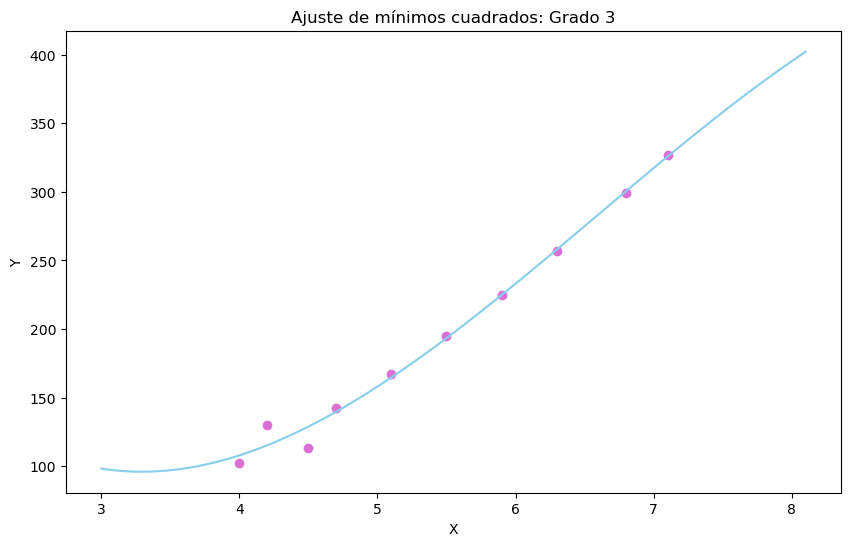

In [232]:
def min_Cuadrados(xs, ys):
    a,b,c,d = np.polyfit(xs, ys, 3)  
    print(f"Polinomio de mínimos cuadrados: {a}x^3 + {b}x^2 + {c}x + {d}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="orchid", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = a * x_line**3 + b * x_line ** 2 + c * x_line + d
    plt.plot(x_line, y_line, color="skyblue", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 3")
    plt.show()

min_Cuadrados(xs, ys)

**d. Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ y calcule el error.**

Para un polinomio de la forma $be^{ax}$, el error está definido como:

$$
E = \sum_{i=1}^n  [ y_i - (be^{a x_i})] ^2 
$$


Obtener las incógnitas $a$ y $b$ requiere de dos ecuaciones que se obtienen de la derivadas parciales de $E$ respecto a $a$ y $b$ respectivamente.

De este modo, se obtiene lo siguiente:

$$
\frac{\delta E}{\delta a} = -2 b \sum_{i=1}^n x_i e ^ {a x_i}  \left( y_i - b e ^ {a x_i} \right) = 0
$$

$$
\frac{\delta E}{\delta a} = -2 \sum_{i=1}^n e ^ {a x_i}  \left( y_i - b e ^ {a x_i} \right) = 0
$$

Al simplificar las expresiones:
$$
\sum_{i=1}^n \left( y_i x_i e ^ {a x_i} -  b x_i e ^ {2 a x_i} \right) = 0
$$

$$
\sum_{i=1}^n \left( y_i e ^ {a x_i} - b e ^ {2 a x_i} \right) = 0
$$

Dado que las ecuaciones obtenidas son las mismas, se realiza una simplificación de la expresión.

$$
ln(y) = a x + ln(b)
$$

Si se toma un cambio de variable de modo que:

$$
Y = ax + B
$$

Donde:
$$Y = ln(y)$$
$$B = ln(b)$$

Es posible aplicar _regresión lineal_ para calcular Y y B.


In [233]:
log_ys = np.log(ys)
a, B = np.polyfit(xs, log_ys, 1)
b = np.exp(B)
y = b * np.exp(a* xs)
print(f"a: {a}, b: {b}")

a: 0.36847662383170704, b: 24.776723697836218


Una vez calculadas las incógnitas se estima el error:

In [234]:
error = sum((y - b * np.exp(a * x)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 821.0051092577957
El error real (RMSE) es: 9.060933225986139


Polinomio de mínimos cuadrados: 24.776723697836218e^(0.36847662383170704x)


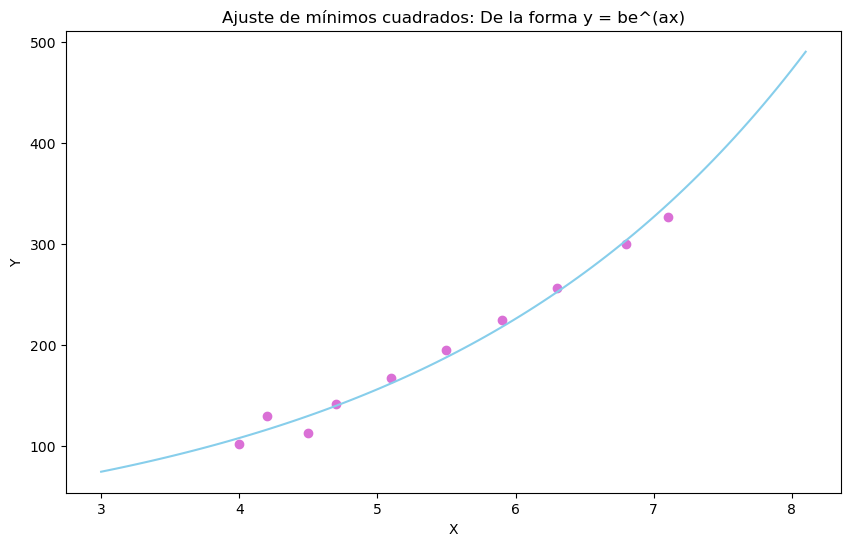

In [235]:
def min_Cuadrados(xs, ys):  
    print(f"Polinomio de mínimos cuadrados: {b}e^({a}x)")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="orchid", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = b * np.exp(a * x_line)
    plt.plot(x_line, y_line, color="skyblue", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: De la forma y = be^(ax)")
    plt.show()

min_Cuadrados(xs, ys)

**e. Construya el polinomio por mínimos cuadrados de la forma $bx^{a}$ y calcule el error.**

Siendo la recta de la forma:

$$y = b x^a$$

Es posible llegar a su forma lineal aplicando el logaritmo natural:

$$ln(y) = a ln(x) + ln(b)$$

De este modo, es posible aplicar _regresión lineal_ para calcular el valor de las incógnitas _a_ y _b_.

In [236]:
log_ys = np.log(ys)
log_xs = np.log(xs)
a, B = np.polyfit(log_xs, log_ys, 1)
b = np.exp(B)
y = b * (xs ** a)
print(f"a: {a}, b: {b}")

a: 1.993284578947899, b: 6.518682345785465


A continuación se estima el error:

In [237]:
error = sum(y - b * (x ** a) for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 3.6804363253636723
El error real (RMSE) es: 0.6066659975112889


Polinomio de mínimos cuadrados: y - 6.518682345785465(x^1.993284578947899)


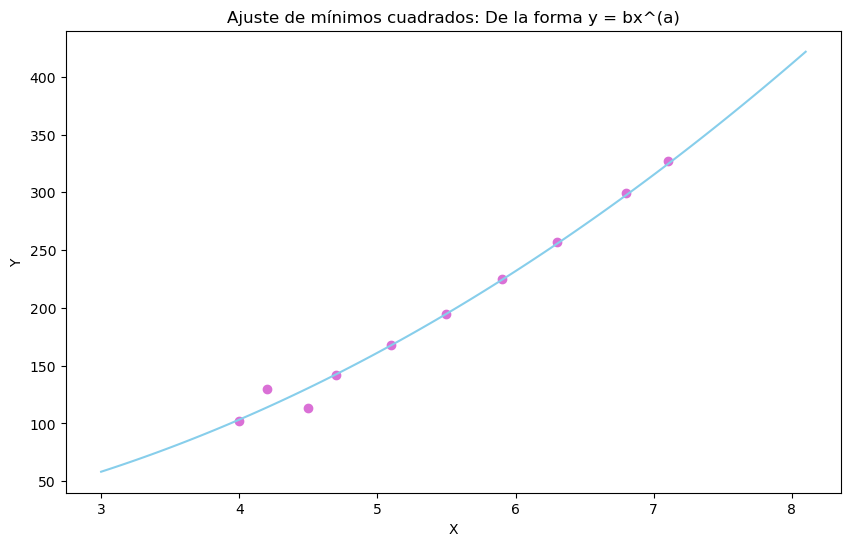

In [238]:
def min_Cuadrados(xs, ys):  
    print(f"Polinomio de mínimos cuadrados: y - {b}(x^{a})")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="orchid", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = b * (x_line ** a)
    plt.plot(x_line, y_line, color="skyblue", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: De la forma y = bx^(a)")
    plt.show()

min_Cuadrados(xs, ys)

## Segundo Ejercicio

In [239]:
xs = np.array([0.2,  0.3,  0.6 , 0.9,  1.1,  1.3,  1.4,  1.6])
ys = np.array([0.050446 , 0.098426 , 0.33277 , 0.72660 , 1.0972 , 1.5697 , 1.8487 , 2.5015])

**a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.**

Para un polinomio de grado 1, el error está dado por:

$$E = \sum_{i=1}^n \left[ y_i - (a_1 x_i + a_0) \right]^2$$

Encontrar las incógnitas $a_1$ y $a_0$ respectivamente, se requiere de dos ecuaciones que se obtienen de las derivadas parciales del error ($E$) respecto de cada una de ellas, posteriormente se iguala cada ecuación a cero.

De este modo, se obtiene lo siguiente:


$$
\frac{\delta E}{\delta a_0} = -2 \sum_{i=1}^n \left( y_i - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_1} = -2 \sum_{i=1}^n x_i \left( y_i - a_1 x_i - a_0 \right) = 0
$$



Reemplando los valores de $x_s$ y $y_s$, se da lugar a las dos ecuaciones:

$$
7.4a_0 + 8.72a_1 = 10.731329
$$
$$
8a_0 + 7.4a_1 = 8.225342
$$

Al resolver el sistema de ecuaciones con el cambio de variable $a_1 = m$ y $a_0 = b$, se obtiene:

In [240]:
sum_x = sum(xs)
sum_y = sum(ys)
sum_x2 = sum([x**2 for x in xs])
sum_xy = sum([x*y for x, y in zip(xs, ys)])
n = len(xs)

m = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
b = (sum_y - m*sum_x) / n
m,b

(1.6655400799999986, -0.5124568239999987)

Una vez calculadas las incógnitas, se calcula el error:

In [241]:
error = sum((y - (m * x + b)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 0.33558985575948813
El error real (RMSE) es: 0.20481389593954805


Polinomio de mínimos cuadrados: 1.6655400799999995x + -0.5124568239999997


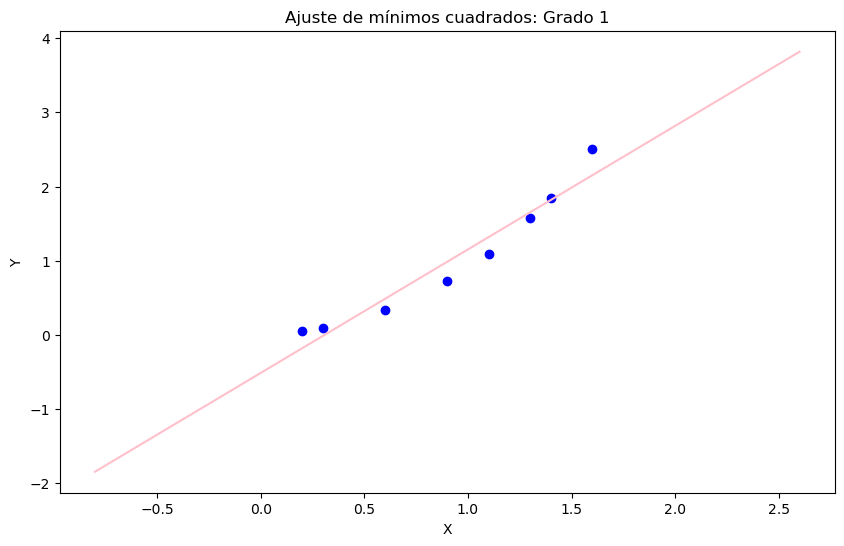

In [242]:
def min_Cuadrados(xs, ys):
    m, b = np.polyfit(xs, ys, 1)  
    print(f"Polinomio de mínimos cuadrados: {m}x + {b}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="blue", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = m * x_line + b
    plt.plot(x_line, y_line, color="pink", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 1")
    plt.show()

min_Cuadrados(xs, ys)

**b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.**

Para un polinomio de grado 2, el error está definido como:

$$
E = \sum_{i=1}^n \left[ y_i - \left( a_2 x_i^2 + a_1 x_i + a_0 \right) \right]^2
$$


Obtener las incógnitas de $a_2$, $a_1$ y $a_0$ requiere de tres ecuaciones que se obtienen de las derivadas parciales de $E$ respecto a cada una de ellas. 

De este modo, se obtiene lo siguiente:


$$
\frac{\delta E}{\delta a_2} = -2 \sum_{i=1}^n x_i ^ 2\left( y_i - a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_1} = -2 \sum_{i=1}^n x_i \left( y_i - a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_0} = -2 \sum_{i=1}^n \left( y_i - a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$


Simplificando estas expresiones, las ecuaciones a obtener con los datos dados son las siguientes:

1. $\sum_{i=1}^n y_i x_i ^ 2  - a_2 x_i^4 - a_1 x_i^3 - a_0 x_i ^ 2 $

2. $\sum_{i=1}^n y_i x_i  - a_2 x_i^3 - a_1 x_i^2 - a_0 x_i $

3. $\sum_{i=1}^n y_i - a_2 x_i^2 - a_1 x_i - a_0 $

Al resolver el sistema de ecuaciones se obtiene:

In [243]:
sum_x2y = sum([x**2*y for x, y in zip(xs, ys)])
sum_x4 = sum([x**4 for x in xs])
sum_x3 = sum([x**3 for x in xs])
sum_x2 = sum([x**2 for x in xs])
sum_xy = sum([x*y for x, y in zip(xs, ys)])
sum_x = sum(xs)
sum_y = sum(ys)
n = len(xs)

# Matriz de coeficientes
A = np.array([
    [sum_x4, sum_x3, sum_x2],
    [sum_x3, sum_x2, sum_x],
    [sum_x2, sum_x, n]
])

# Vector de términos independientes
B = np.array([sum_x2y, sum_xy, sum_y])

# Resolver el sistema de ecuaciones
coefficients = np.linalg.solve(A, B)

a2, a1, a0 = coefficients
print(f"a2: {a2}, a1: {a1}, a0: {a0}")


a2: 1.129423867019547, a1: -0.3114034568310171, a0: 0.08514393251738478


Una vez calculadas las incógnitas se estima el error:

In [244]:
error = sum((y - (a2 * x **2 + a1 * x + a0)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 0.0024199149294267253
El error real (RMSE) es: 0.017392221427360584


Polinomio de mínimos cuadrados: 1.129423867019517x^2 + -0.3114034568309622x+ 0.08514393251736695


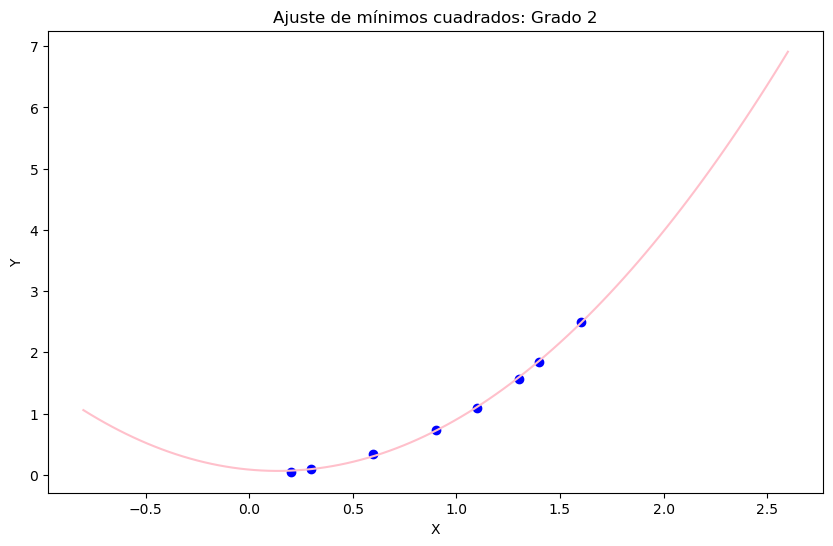

In [245]:
def min_Cuadrados(xs, ys):
    a,b,c = np.polyfit(xs, ys, 2)  
    print(f"Polinomio de mínimos cuadrados: {a}x^2 + {b}x+ {c}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="blue", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = a * x_line**2 + b * x_line + c
    plt.plot(x_line, y_line, color="pink", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 2")
    plt.show()

min_Cuadrados(xs, ys)

**c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.**

Para un polinomio de grado 3, el error está definido como:

$$
E = \sum_{i=1}^n \left[ y_i - \left( a_3 x_i^3 + a_2 x_i^2 + a_1 x_i + a_0 \right) \right]^2
$$


Obtener las incógnitas de $a_3$, $a_2$, $a_1$ y $a_0$ requiere de cuatro ecuaciones que se obtienen de las derivadas parciales de $E$ respecto a cada una de ellas. 

De este modo, se obtiene lo siguiente:

$$
\frac{\delta E}{\delta a_3} = -2 \sum_{i=1}^n x_i ^ 3 \left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_2} = -2 \sum_{i=1}^n x_i ^ 2\left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_1} = -2 \sum_{i=1}^n x_i \left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$

$$
\frac{\delta E}{\delta a_0} = -2 \sum_{i=1}^n \left( y_i - a_3 x_i^3- a_2 x_i^2 - a_1 x_i - a_0 \right) = 0
$$


Simplificando estas expresiones, las ecuaciones a obtener con los datos dados son las siguientes:

1. $\sum_{i=1}^n y_i x_i ^ 3  - a_3 x_i^6 - a_2 x_i^5 - a_1 x_i^4 - a_0 x_i ^ 3 $

2. $\sum_{i=1}^n y_i x_i ^ 2  - a_3 x_i^5 - a_2 x_i^4 - a_1 x_i^3 - a_0 x_i ^ 2 $

3. $\sum_{i=1}^n y_i x_i  - a_3 x_i^4 - a_2 x_i^3 - a_1 x_i^2 - a_0 x_i $

4. $\sum_{i=1}^n y_i - a_3 x_i^3 - a_2 x_i^2 - a_1 x_i - a_0 $

In [246]:
sum_x3y = sum([x**3*y for x, y in zip(xs, ys)])
sum_x6 = sum([x**6 for x in xs])
sum_x5 = sum([x**5 for x in xs])
sum_x2y = sum([x**2*y for x, y in zip(xs, ys)])
sum_x4 = sum([x**4 for x in xs])
sum_x3 = sum([x**3 for x in xs])
sum_x2 = sum([x**2 for x in xs])
sum_xy = sum([x*y for x, y in zip(xs, ys)])
sum_x = sum(xs)
sum_y = sum(ys)
n = len(xs)

# Matriz de coeficientes
A = np.array([
    [sum_x6, sum_x5, sum_x4,sum_x3],
    [sum_x5,sum_x4, sum_x3, sum_x2],
    [sum_x4,sum_x3, sum_x2, sum_x],
    [sum_x3,sum_x2, sum_x, n]
])

# Vector de términos independientes
B = np.array([sum_x3y,sum_x2y, sum_xy, sum_y])

# Resolver el sistema de ecuaciones
coefficients = np.linalg.solve(A, B)

a3, a2, a1, a0 = coefficients
print(f"a3: {a3}, a2: {a2}, a1: {a1}, a0: {a0}")


a3: 0.2662080977392518, a2: 0.4029322130984173, a1: 0.24838578418995033, a0: -0.01840139929610755


Una vez calculadas las incógnitas se estima el error:

In [247]:
error = sum((y - (a3 * x **3 +a2 * x **2 + a1 * x + a0)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 5.074671555627452e-06
El error real (RMSE) es: 0.0007964508424588623


Polinomio de mínimos cuadrados: 0.2662080977395242x^3 + 0.40293221309765137x^2 + 0.2483857841905641x + -0.018401399296226938


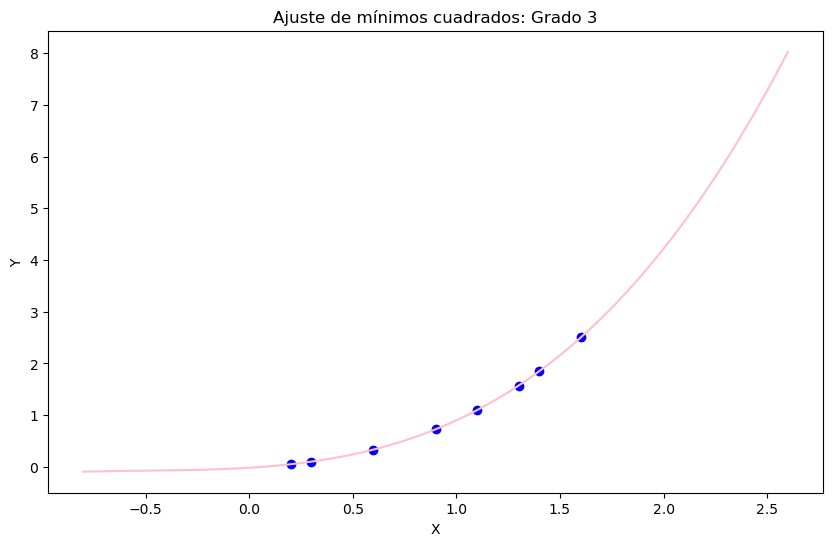

In [248]:
def min_Cuadrados(xs, ys):
    a,b,c,d = np.polyfit(xs, ys, 3)  
    print(f"Polinomio de mínimos cuadrados: {a}x^3 + {b}x^2 + {c}x + {d}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="blue", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = a * x_line**3 + b * x_line ** 2 + c * x_line + d
    plt.plot(x_line, y_line, color="pink", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 3")
    plt.show()

min_Cuadrados(xs, ys)

**d. Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ y calcule el error.**

Para un polinomio de la forma $be^{ax}$, el error está definido como:

$$
E = \sum_{i=1}^n  [ y_i - (be^{a x_i})] ^2 
$$


Obtener las incógnitas $a$ y $b$ requiere de dos ecuaciones que se obtienen de la derivadas parciales de $E$ respecto a $a$ y $b$ respectivamente.

De este modo, se obtiene lo siguiente:

$$
\frac{\delta E}{\delta a} = -2 b \sum_{i=1}^n x_i e ^ {a x_i}  \left( y_i - b e ^ {a x_i} \right) = 0
$$

$$
\frac{\delta E}{\delta a} = -2 \sum_{i=1}^n e ^ {a x_i}  \left( y_i - b e ^ {a x_i} \right) = 0
$$

Al simplificar las expresiones:
$$
\sum_{i=1}^n \left( y_i x_i e ^ {a x_i} -  b x_i e ^ {2 a x_i} \right) = 0
$$

$$
\sum_{i=1}^n \left( y_i e ^ {a x_i} - b e ^ {2 a x_i} \right) = 0
$$

Dado que las ecuaciones obtenidas son las mismas, se realiza una simplificación de la expresión.

$$
ln(y) = a x + ln(b)
$$

Si se toma un cambio de variable de modo que:

$$
Y = ax + B
$$

Donde:
$$Y = ln(y)$$
$$B = ln(b)$$

Es posible aplicar _regresión lineal_ para calcular Y y B.


In [249]:
log_ys = np.log(ys)
a, B = np.polyfit(xs, log_ys, 1)
b = np.exp(B)
y = b * np.exp(a* xs)
print(f"a: {a}, b: {b}")

a: 2.707294686913416, b: 0.04570748069533032


In [250]:
error = sum((y - b * np.exp(a * x)) ** 2 for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 1.0750485031891717
El error real (RMSE) es: 0.366580227097216


Polinomio de mínimos cuadrados: 0.04570748069533032e^(2.707294686913416x)


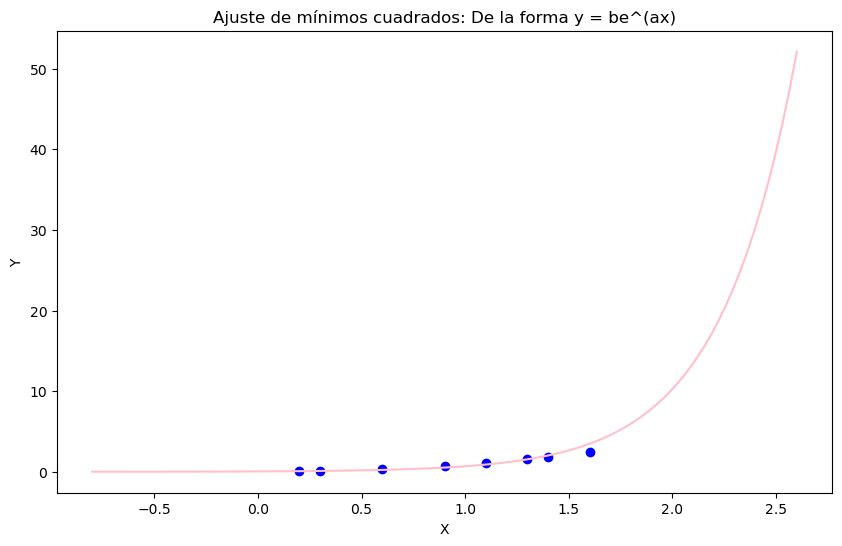

In [251]:
def min_Cuadrados(xs, ys):  
    print(f"Polinomio de mínimos cuadrados: {b}e^({a}x)")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="blue", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = b * np.exp(a * x_line)
    plt.plot(x_line, y_line, color="pink", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: De la forma y = be^(ax)")
    plt.show()

min_Cuadrados(xs, ys)

**e. Construya el polinomio por mínimos cuadrados de la forma $bx^{a}$ y calcule el error.**

Siendo la recta de la forma:

$$y = b x^a$$

Es posible llegar a su forma lineal aplicando el logaritmo natural:

$$ln(y) = a ln(x) + ln(b)$$

De este modo, es posible aplicar _regresión lineal_ para calcular el valor de las incógnitas _a_ y _b_.

In [252]:
log_ys = np.log(ys)
log_xs = np.log(xs)
a, B = np.polyfit(log_xs, log_ys, 1)
b = np.exp(B)
y = b * (xs ** a)
print(f"a: {a}, b: {b}")

a: 1.872009284326521, b: 0.9501564755920616


A continuación se estima el error:

In [253]:
error = sum(y - b * (x ** a) for x, y in zip(xs, ys))
print(f"El error cuadrático es: {error}")

rmse = np.sqrt(error / n)
print(f"El error real (RMSE) es: {rmse}")

El error cuadrático es: 0.17095088084160548
El error real (RMSE) es: 0.14618091566685676


Polinomio de mínimos cuadrados: y - 0.9501564755920616(x^1.872009284326521)


C:\Users\Dayana\AppData\Local\Temp\ipykernel_34488\4022936202.py:7: RuntimeWarning: invalid value encountered in power
  y_line = b * (x_line ** a)


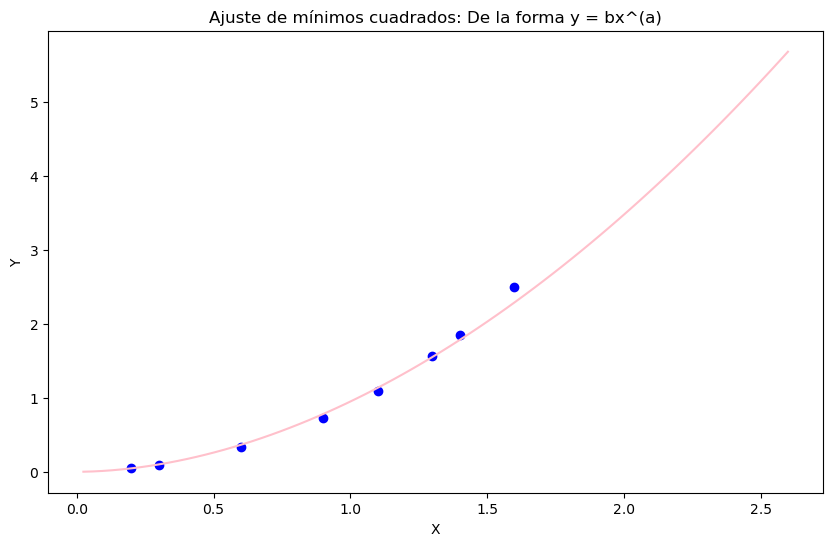

In [254]:
def min_Cuadrados(xs, ys):  
    print(f"Polinomio de mínimos cuadrados: y - {b}(x^{a})")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="blue", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = b * (x_line ** a)
    plt.plot(x_line, y_line, color="pink", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: De la forma y = bx^(a)")
    plt.show()

min_Cuadrados(xs, ys)

## Tercer Ejercicio

**La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias 
computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de 
la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique 
estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.**


| Puntuación ACT | Promedio de puntos |
|----------------|---------------------|
| 28             | 3.84               |
| 25             | 3.21               |
| 28             | 3.23               |
| 27             | 3.63               |
| 28             | 3.75               |
| 33             | 3.20               |
| 28             | 3.41               |
| 29             | 3.38               |
| 23             | 3.53               |
| 27             | 2.03               |
| 29             | 3.75               |
| 28             | 3.65               |
| 27             |   3.87             |
| 29             |   3.75             |
| 21             |   1.66             |
| 28             |   3.12             |
| 28             |   2.96             |
| 26             |   2.92             |
| 30             |   3.10             |
| 24             |   2.81             |


In [255]:
xs = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 29, 21, 28, 28, 26, 30, 24]
ys = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]

Polinomio de mínimos cuadrados: 0.10085803432137289x + 0.4865756630265184


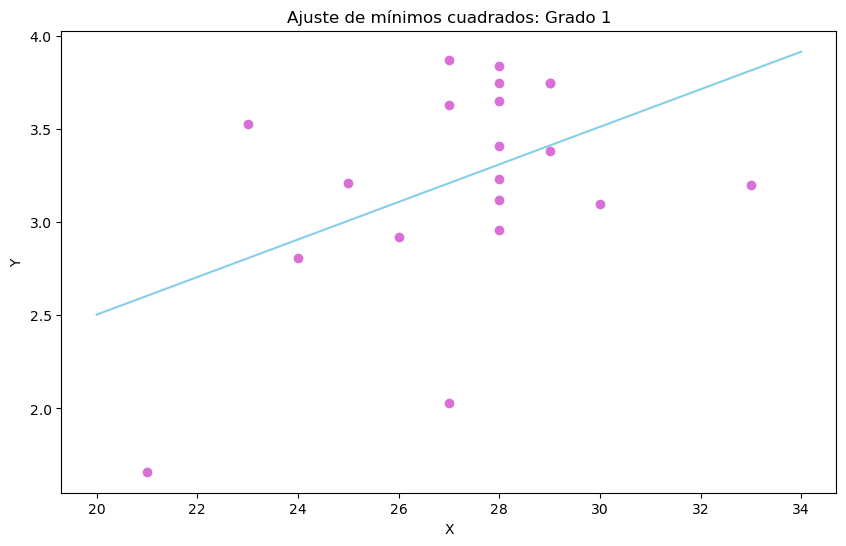

In [256]:
def min_Cuadrados(xs, ys):
    m, b = np.polyfit(xs, ys, 1)  
    print(f"Polinomio de mínimos cuadrados: {m}x + {b}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="orchid", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = m * x_line + b
    plt.plot(x_line, y_line, color="skyblue", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 1")
    plt.show()

min_Cuadrados(xs, ys)

## Cuarto Ejercicio 

**El  siguiente  conjunto  de  datos,  presentado  al Subcomité  Antimonopolio  del  Senado,  muestra  las características  comparativas  de  supervivencia  durante un  choque  de  automóviles  de  diferentes  clases. Encuentre  la  recta  por  mínimos  cuadrados  que  aproxima  estos  datos  (la  tabla  muestra  el  porcentaje  de vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).**

| Tipo                              | Peso promedio | Porcentaje de presentación |
|-----------------------------------|---------------|----------------------------|
| 1. Regular lujoso doméstico       | 4800 lb       | 3.1                        |
| 2. Regular intermedio doméstico   | 3700 lb       | 4.0                        |
| 3. Regular económico doméstico    | 3400 lb       | 5.2                        |
| 4. Compacto doméstico             | 2800 lb       | 6.4                        |
| 5. Compacto extranjero            | 1900 lb       | 9.6                        |


In [257]:
xs = [4800, 3700, 3400, 2800, 1900]
ys = [3.1, 4.0, 5.2, 6.4, 9.6]

Polinomio de mínimos cuadrados: -0.0022549697493517706x + 13.146499567847878


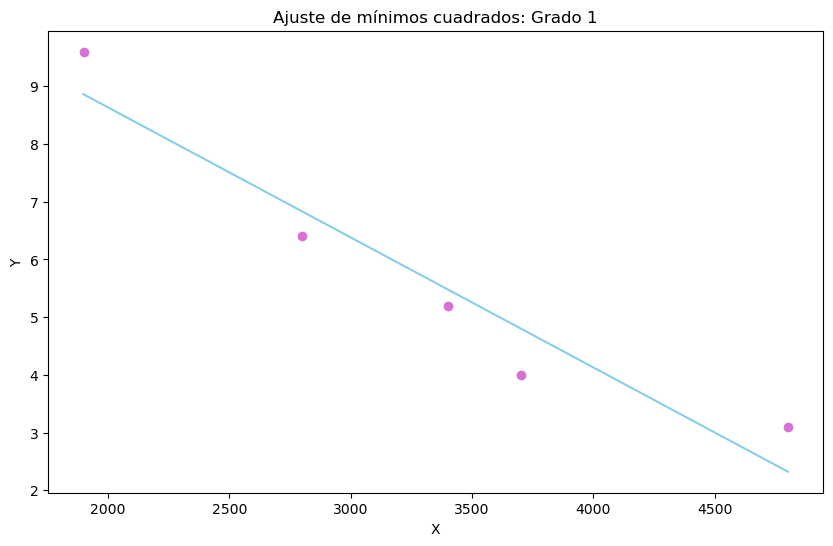

In [258]:
def min_Cuadrados(xs, ys):
    m, b = np.polyfit(xs, ys, 1)  
    print(f"Polinomio de mínimos cuadrados: {m}x + {b}")
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, color="orchid", label="Puntos")

    x_line = np.linspace(min(xs) - 1, max(xs) + 1, 100)
    y_line = m * x_line + b
    plt.plot(x_line, y_line, color="skyblue", label=f"Línea ajustada: y = {m:.2f}x + {b:.2f}")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste de mínimos cuadrados: Grado 1")
    plt.show()

min_Cuadrados(xs, ys)

**GitHub:** git@github.com: alda244



[GitHub Métodos Númericos - Repositorio](https://github.com/alda244/MN_Deberes/blob/main/PereiraAlicia_Deber08.ipynb)